# IMDB Sentiment Analysis

The data is split evenly with 25k reviews intended for training and 25k for testing your classifier. Moreover, each set has 12.5k positive and 12.5k negative reviews.

IMDb lets users rate movies on a scale from 1 to 10. To label these reviews the curator of the data labeled anything with ≤ 4 stars as negative and anything with ≥ 7 stars as positive. Reviews with 5 or 6 stars were left out.

**Import the required libraries**

In [5]:
import numpy as np
import pandas as pd
import os
import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#!pip install nltk

**Load Data**

In [6]:
reviews_train = []
for line in open('C:/Users/hegoi/Datasets/NLP/NLTK-CountVectorizer' + '/data/imbd_train.txt', 'r', encoding='latin1'):
    
    reviews_train.append(line.strip())
    
reviews_test = []
for line in open('C:/Users/hegoi/Datasets/NLP/NLTK-CountVectorizer'+ '/data/imbd_test.txt', 'r', encoding='latin1'):
    
    reviews_test.append(line.strip())

In [7]:
for i in range(3):
    print('####################')
    print(reviews_train[i])

####################
Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!
####################
Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once conside

**See one of the elements in the list**

In [8]:
print(len(reviews_train))
print(len(reviews_test))
reviews_train[5]

25000
25000


"This isn't the comedic Robin Williams, nor is it the quirky/insane Robin Williams of recent thriller fame. This is a hybrid of the classic drama without over-dramatization, mixed with Robin's new love of the thriller. But this isn't a thriller, per se. This is more a mystery/suspense vehicle through which Williams attempts to locate a sick boy and his keeper.<br /><br />Also starring Sandra Oh and Rory Culkin, this Suspense Drama plays pretty much like a news report, until William's character gets close to achieving his goal.<br /><br />I must say that I was highly entertained, though this movie fails to teach, guide, inspect, or amuse. It felt more like I was watching a guy (Williams), as he was actually performing the actions, from a third person perspective. In other words, it felt real, and I was able to subscribe to the premise of the story.<br /><br />All in all, it's worth a watch, though it's definitely not Friday/Saturday night fare.<br /><br />It rates a 7.7/10 from...<br />

The raw text is pretty messy for these reviews so before we can do any analytics we need to clean things up


**Use Regular expressions to remove the non text characters, and the html tags**

In [9]:
import re

# Remover todos los signos de puntuación, exclamaciones...
# Tb pasamos a minuscula y nos cargamos etiquetas HTML
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    # Para todas las reviews en minuscula, sustituye algunas cosas por espacio y otras por vacio.
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

# Reviews tras aplicar la limpieza
reviews_train_clean = preprocess_reviews(reviews_train)
reviews_test_clean = preprocess_reviews(reviews_test)

In [10]:
reviews_train_clean[5]

"this isn't the comedic robin williams nor is it the quirky insane robin williams of recent thriller fame this is a hybrid of the classic drama without over dramatization mixed with robin's new love of the thriller but this isn't a thriller per se this is more a mystery suspense vehicle through which williams attempts to locate a sick boy and his keeper also starring sandra oh and rory culkin this suspense drama plays pretty much like a news report until william's character gets close to achieving his goal i must say that i was highly entertained though this movie fails to teach guide inspect or amuse it felt more like i was watching a guy williams as he was actually performing the actions from a third person perspective in other words it felt real and i was able to subscribe to the premise of the story all in all it's worth a watch though it's definitely not friday saturday night fare it rates a   from the fiend "

# Vectorization
In order for this data to make sense to our machine learning algorithm we’ll need to convert each review to a numeric representation, which we call vectorization.

The simplest form of this is to create one very large matrix with one column for every unique word in your corpus (where the corpus is all 50k reviews in our case). Then we transform each review into one row containing 0s and 1s, where 1 means that the word in the corpus corresponding to that column appears in that review. That being said, each row of the matrix will be very sparse (mostly zeros). This process is also known as one hot encoding. Use the *CountVectorizer* method.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
]

In [13]:
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [14]:
len(vectorizer.get_feature_names_out())

9

In [15]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 21 stored elements and shape (4, 9)>

In [16]:
corpus[0]

'This is the first document.'

In [17]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,1,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


In [18]:
# Si aparece una palabra en una review, le pone un 1. Da igual que aparezca 100 veces, no cuenta. Xq binary=True
# Solo pone 1s cuando detecta una palabra en una review
baseline_vectorizer = CountVectorizer(binary=True)
baseline_vectorizer.fit(reviews_train_clean)

# Reviews en formato vector de palabras. El mismo vectorizador a test, tiene que mantener la estructura
X_baseline = baseline_vectorizer.transform(reviews_train_clean)
X_test_baseline = baseline_vectorizer.transform(reviews_test_clean)

In [19]:
X_baseline

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3410713 stored elements and shape (25000, 87063)>

In [20]:
reviews_train_clean[0]

"bromwell high is a cartoon comedy it ran at the same time as some other programs about school life such as teachers my  years in the teaching profession lead me to believe that bromwell high's satire is much closer to reality than is teachers the scramble to survive financially the insightful students who can see right through their pathetic teachers' pomp the pettiness of the whole situation all remind me of the schools i knew and their students when i saw the episode in which a student repeatedly tried to burn down the school i immediately recalled  at  high a classic line inspector i'm here to sack one of your teachers student welcome to bromwell high i expect that many adults of my age think that bromwell high is far fetched what a pity that it isn't"

In [21]:
print(X_baseline.shape)

# Asigna un numero según el orden de aparicion
baseline_vectorizer.vocabulary_

(25000, 87063)


{'bromwell': 9819,
 'high': 35211,
 'is': 39472,
 'cartoon': 11686,
 'comedy': 14754,
 'it': 39642,
 'ran': 61772,
 'at': 4537,
 'the': 76725,
 'same': 66138,
 'time': 77626,
 'as': 4211,
 'some': 71188,
 'other': 54861,
 'programs': 60156,
 'about': 284,
 'school': 67025,
 'life': 44297,
 'such': 74177,
 'teachers': 75997,
 'my': 51490,
 'years': 86260,
 'in': 37733,
 'teaching': 76000,
 'profession': 60088,
 'lead': 43605,
 'me': 47976,
 'to': 77922,
 'believe': 6894,
 'that': 76671,
 'satire': 66462,
 'much': 51018,
 'closer': 14125,
 'reality': 62242,
 'than': 76643,
 'scramble': 67253,
 'survive': 74812,
 'financially': 27904,
 'insightful': 38615,
 'students': 73768,
 'who': 84627,
 'can': 11132,
 'see': 67695,
 'right': 64476,
 'through': 77369,
 'their': 76762,
 'pathetic': 56362,
 'pomp': 58787,
 'pettiness': 57341,
 'of': 53843,
 'whole': 84639,
 'situation': 69959,
 'all': 2038,
 'remind': 63323,
 'schools': 67049,
 'knew': 42226,
 'and': 2762,
 'when': 84450,
 'saw': 66588,

In [22]:
vectorizer_c = CountVectorizer()
vectorizer_c.fit(reviews_train_clean)

# Ya no es binaria la aparicion, sino un conteo por palabra
X_baseline_c = vectorizer_c.transform(reviews_train_clean)

In [23]:
print(X_baseline_c.shape)
print(len(vectorizer_c.get_feature_names_out())) # Las mismas
# X_baseline_c.toarray()

(25000, 87063)
87063


In [24]:
# Matriz demasiado grande como para que numpy la imprima por pantalla
X_baseline_c

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3410713 stored elements and shape (25000, 87063)>

# Train a Baseline Model

Train a Logistic Regression model after transforming the data with CountVectorized

* They’re easy to interpret
* Linear models tend to perform well on sparse datasets like this one
* They learn very fast compared to other algorithms.

Test models with C values of [0.01, 0.05, 0.25, 0.5, 1] and see wich is the best value for C, and calculate the accuracy

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Los comentarios vienen ordenados. Los primeros 12,5k son negativos
# A test le ocurre lo mismo
target = [1 if i < 12500 else 0 for i in range(25000)]

# target = []
# for i in range(25000):
#     if i < 12500: 
#         target.append(1)
#     else:
#         target.append(0)

def train_model(X_TRAIN, X_TEST):
    
    lr = LogisticRegression()
    
    params = {
        'C': [0.01, 0.05, 0.25, 0.5, 1]
    }
    
    grid = GridSearchCV(lr, params, cv=5)
    grid.fit(X_TRAIN, target)

    print ("Final Accuracy: %s" % accuracy_score(target, grid.best_estimator_.predict(X_TEST)))


In [26]:
#TARDA
train_model(X_baseline, X_test_baseline)

Final Accuracy: 0.88184


# Remove Stop Words

Stop words are the very common words like ‘if’, ‘but’, ‘we’, ‘he’, ‘she’, and ‘they’. We can usually remove these words without changing the semantics of a text and doing so often (but not always) improves the performance of a model. Removing these stop words becomes a lot more useful when we start using longer word sequences as model features (see n-grams below).

Before we apply the CountVectorized, lets remove the stopwords, included in nltk.corpus

Then apply the CountVectorizer, and train the Logistic regression model and obtain the accuracy.

In [28]:
# Hay que bajarse las stopwords de nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hegoi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# Para visualizar los stopwords de inglés
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [30]:
# Para visualizarlas en español
stopwords.words('spanish')[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [31]:
# Para visualizarlas en español
stopwords.words('chinese')[:10]

['一', '一下', '一些', '一切', '一则', '一天', '一定', '一方面', '一旦', '一时']

In [32]:
stopwords.words('catalan')[:10]

['a',
 'abans',
 'ací',
 'ah',
 'així',
 'això',
 'al',
 'aleshores',
 'algun',
 'alguna']

In [33]:
stopwords.words('basque')[:10]

['ahala',
 'aitzitik',
 'al',
 'ala ',
 'alabadere',
 'alabaina',
 'alabaina',
 'aldiz ',
 'alta',
 'amaitu']

In [34]:
len(stopwords.words('english'))

198

In [35]:
len(stopwords.words('spanish'))

313

In [36]:
len(stopwords.words('chinese'))

841

In [37]:
len(stopwords.words('basque'))

326

In [38]:
from nltk.corpus import stopwords

# Aplicamos la eliminacion de las palabras directamente sobre las reviews
# Demasiado manual. Mejor sobre el CountVectorizer (ver abajo)
english_stop_words = stopwords.words('english')

def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        
        # Para cada review elimina las stopwords, y separa todas las palabras por espacio
        removed_stop_words.append(
            ' '.join([word for word in review.split() if word not in english_stop_words])
        )
        
    return removed_stop_words

# Se lo aplicamos antes de vectorizar
no_stop_words_train = remove_stop_words(reviews_train_clean)
no_stop_words_test = remove_stop_words(reviews_test_clean)

In [39]:
'''
Vectorizamos tras eliminar las stop words
Ver docu, tiene cosas interesantes como lowercase=True. Lo hace antes de vectorizar, 
o el argumento stopwords
'''
cv = CountVectorizer(binary=True)
cv.fit(no_stop_words_train)

X = cv.transform(no_stop_words_train)



In [40]:
print(X.shape)

(25000, 87046)


In [41]:
# Se aplica el mismo a test
X_test = cv.transform(no_stop_words_test)

# Y entrenamos
train_model(X, X_test)

Final Accuracy: 0.879


In [42]:
'''
X_baseline tras aplicar el vectorizador tal cual en los datos
X tras aplicar el vectorizador despues de eliminar las stop words. No se carga muchas
'''
print(X_baseline.shape)
print(X.shape)
print("Stop words eliminadas:", X_baseline.shape[1] - X.shape[1])

(25000, 87063)
(25000, 87046)
Stop words eliminadas: 17


In [43]:
#TARDA
'''
El resultado de este codigo es practicamente igual que el anterior, pero elimina más stopwords
'''

cv = CountVectorizer(binary=True,
                     stop_words = english_stop_words)

cv.fit(reviews_train_clean)

X = cv.transform(reviews_train_clean)
X_test = cv.transform(reviews_test_clean)

train_model(X, X_test)

Final Accuracy: 0.87964


In [44]:
'''
X_baseline tras aplicar el vectorizador tal cual en los datos
X tras aplicar el vectorizador despus de eliminar las stop words
En este caso elimina más, el countvectorizer tokeniza mejor las palabras
de lo que lo hemos hecho nosotros en la funcion remove_stop_words. Por ejemplo "it's" serian dos palabras
'''
print(X_baseline.shape)
print(X.shape)
print("Stop words eliminadas:", X_baseline.shape[1] - X.shape[1])

(25000, 87063)
(25000, 86918)
Stop words eliminadas: 145


**Note:** In practice, an easier way to remove stop words is to just use the stop_words argument with any of scikit-learn’s ‘Vectorizer’ classes. If you want to use NLTK’s full list of stop words you can do stop_words='english’. In practice I’ve found that using NLTK’s list actually decreases my performance because its too expansive, so I usually supply my own list of words. For example, stop_words=['in','of','at','a','the'] .

A common next step in text preprocessing is to normalize the words in your corpus by trying to convert all of the different forms of a given word into one. Two methods that exist for this are Stemming and Lemmatization.

# Stemming

Stemming is considered to be the more crude/brute-force approach to normalization (although this doesn’t necessarily mean that it will perform worse). There’s several algorithms, but in general they all use basic rules to chop off the ends of words.

NLTK has several stemming algorithm implementations. We’ll use the Porter stemmer. Most used:
* PorterStemmer
* SnowballStemmer

Apply a PoterStemmer, vectorize, and train the model again

In [45]:
'''
El stemmer se aplica sobre cada palabra. Las recorta eliminando plurales y tiempos verbales
Modifica muy poco cada palabra
'''

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

plurals = ['caresses', 'flies', 'fly','flight', 'flown', 'dies', 'die', 'mules', 'denied', 'deny',
            'died', 'agreed','agree', 'owned', 'humbled', 'sized',
            'meeting', 'stating', 'siezing', 'itemization',
            'sensational', 'traditional', 'reference', 'colonizer', 'colonizing',
            'plotted']
singles = [stemmer.stem(plural) for plural in plurals]

print(' '.join(singles))

caress fli fli flight flown die die mule deni deni die agre agre own humbl size meet state siez item sensat tradit refer colon colon plot


In [46]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

plurals = ['caresses', 'flies', 'fly','flight', 'dies', 'mules', 'denied', 'deny',
            'died', 'agreed', 'owned', 'humbled', 'sized',
            'meeting', 'stating', 'siezing', 'itemization',
            'sensational', 'traditional', 'reference', 'colonizer',
            'plotted']
singles = [stemmer.stem(plural) for plural in plurals]

print(' '.join(singles))

caress fli fli flight die mule deni deni die agre own humbl size meet state siez item sensat tradit refer colon plot


In [47]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('spanish')

plurals = ['recorrer', 'corriendo', 'correlación', 'correré', 'casas', 'casero', 'caso', 'playa', 'volando', 'volar', 'volveré']
singles = [stemmer.stem(plural) for plural in plurals]

print(' '.join(singles))

recorr corr correl corr cas caser cas play vol vol volv


In [48]:
# Aplicamos a mano. Los stemmers no eliminan palabras, solo quitan sufijos, y ahora habrá más palabras que sean iguales
#TARDA EN EJECUTAR
from nltk.stem.porter import PorterStemmer

def get_stemmed_text(corpus):
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

stemmed_reviews_train = get_stemmed_text(reviews_train_clean)
stemmed_reviews_test = get_stemmed_text(reviews_test_clean)

cv = CountVectorizer(binary=True, stop_words = english_stop_words)
cv.fit(stemmed_reviews_train)

X_stem = cv.transform(stemmed_reviews_train)
X_test = cv.transform(stemmed_reviews_test)

In [49]:
train_model(X_stem, X_test)

Final Accuracy: 0.8768


In [50]:
# No elimina palabras. Solo recorta sufijos y agrupa tipos de palabras.
# Como resultado dará menos palabras debido al agrupado. Se carga unas cuantas letras de las palabras
print(X_baseline.shape)
print(X_stem.shape)
print("Diff X normal y X tras stemmer y vectorización:", X_baseline.shape[1] - X_stem.shape[1])

(25000, 87063)
(25000, 66715)
Diff X normal y X tras stemmer y vectorización: 20348


# Lemmatization

Lemmatization works by identifying the part-of-speech of a given word and then applying more complex rules to transform the word into its true root.

In [51]:
import nltk

In [52]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hegoi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [53]:
'''
La diferencia con el stemming es que la lematización tiene en cuenta la morfología
de la palabra, sustituyendola por la raiz, no recortándola. Y no es tan restrictivo como el stemming.
Necesita un buen diccionario con mapeos, como wordnet

En nltk no hay lematizadores en español. Habria que bajarse algun paquete como pip install es-lemmatizer
'''

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

plurals = ['caresses', 'flies','fly','flight', 'dies', 'mules', 'studies',
            'died', 'agreed', 'owned', 'humbled', 'sized',
            'meeting', 'stating', 'siezing', 'itemization',
            'sensational', 'traditional', 'reference', 'colonizer',
            'plotted']
singles = [lemmatizer.lemmatize(plural) for plural in plurals]

print(' '.join(singles))

caress fly fly flight dy mule study died agreed owned humbled sized meeting stating siezing itemization sensational traditional reference colonizer plotted


In [54]:
# TARDA EN EJECUTAR
def get_lemmatized_text(corpus):
    
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

# Lematizamos las reviews
lemmatized_reviews_train = get_lemmatized_text(reviews_train_clean)
lemmatized_reviews_test = get_lemmatized_text(reviews_test_clean)

# Vectorizamos con conteo tras lematizar
cv = CountVectorizer(binary=True, stop_words = english_stop_words)
cv.fit(lemmatized_reviews_train)

X = cv.transform(lemmatized_reviews_train)
X_test = cv.transform(lemmatized_reviews_test)

train_model(X, X_test)

Final Accuracy: 0.87824


In [55]:
# Elimina menos que con el stemmer. Normal, el stemmer recorta mucho del sufijo
print(X_baseline.shape)
print(X.shape)
print("Diff X normal y X tras lematizador y vectorización:", X_baseline.shape[1] - X.shape[1])

(25000, 87063)
(25000, 80215)
Diff X normal y X tras lematizador y vectorización: 6848


# n-grams

We can potentially add more predictive power to our model by adding two or three word sequences (bigrams or trigrams) as well. For example, if a review had the three word sequence “didn’t love movie” we would only consider these words individually with a unigram-only model and probably not capture that this is actually a negative sentiment because the word ‘love’ by itself is going to be highly correlated with a positive review.

The scikit-learn library makes this really easy to play around with. Just use the ngram_range argument with any of the ‘Vectorizer’ classes.

In [56]:
from nltk import ngrams

sentence = "didn't love music at all my love"

one = ngrams(sentence.split(), 1)
two = ngrams(sentence.split(), 2)
three = ngrams(sentence.split(), 3)

for grams in one:
  print(grams)
print('###############')

for grams in two:
  print(grams)
print('###############')
for grams in three:
  print(grams)



("didn't",)
('love',)
('music',)
('at',)
('all',)
('my',)
('love',)
###############
("didn't", 'love')
('love', 'music')
('music', 'at')
('at', 'all')
('all', 'my')
('my', 'love')
###############
("didn't", 'love', 'music')
('love', 'music', 'at')
('music', 'at', 'all')
('at', 'all', 'my')
('all', 'my', 'love')


In [57]:
'''
Puede ser bigramas si ngram_range=(2,2), o trigramas (3,3)...
Algunas palabras las elimina, como 'a'. Cuidado con eso a la hora de hacer el conteo
ngram_range=(1, 3) significa las palabras por separado, los bigramas y los trigramas
Ojo que esto aumenta muchisimo el espacio de features
'''
ngram_vectorizer = CountVectorizer(binary=True,
                                   ngram_range=(1, 2))

vector = ngram_vectorizer.fit_transform([sentence]).toarray()
print(vector)
print(len(vector[0]))

[[1 1 1 1 1 1 1 1 1 1 1 1]]
12


In [58]:
#TARDA EN EJECUTAR
'''
Va como argumento del CountVectorizer
'''
ngram_vectorizer = CountVectorizer(binary=True, stop_words = english_stop_words,
                                   ngram_range=(1, 2))

ngram_vectorizer.fit(reviews_train_clean)

X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

train_model(X, X_test)

Final Accuracy: 0.88956


In [59]:
# Añade 1448047 n gramas. Cuanto mas ngramas, mayor será el espacio de features
print(X_baseline.shape)
print(X.shape)
print("Diff X normal y X tras lematizador y vectorización:", X_baseline.shape[1] - X.shape[1])

(25000, 87063)
(25000, 1865232)
Diff X normal y X tras lematizador y vectorización: -1778169


In [60]:
#TARDA EN EJECUTAR
'''
Va como argumento del CountVectorizer
'''
ngram_vectorizer = CountVectorizer(binary=True, stop_words = english_stop_words,
                                   ngram_range=(2, 2))

ngram_vectorizer.fit(reviews_train_clean)

X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

print(X_baseline.shape)
print(X.shape)
print("Diff X normal y X tras lematizador y vectorización:", X_baseline.shape[1] - X.shape[1])

# train_model(X, X_test)

(25000, 87063)
(25000, 1778314)
Diff X normal y X tras lematizador y vectorización: -1691251


# TF-IDF

Another common way to represent each document in a corpus is to use the tf-idf statistic (term frequency-inverse document frequency) for each word, which is a weighting factor that we can use in place of binary or word count representations.

There are several ways to do tf-idf transformation but in a nutshell, **tf-idf aims to represent the number of times a given word appears in a document (a movie review in our case) relative to the number of documents in the corpus that the word appears in**.

**Note:** Now that we’ve gone over n-grams, when I refer to ‘words’ I really mean any n-gram (sequence of words) if the model is using an n greater than one.

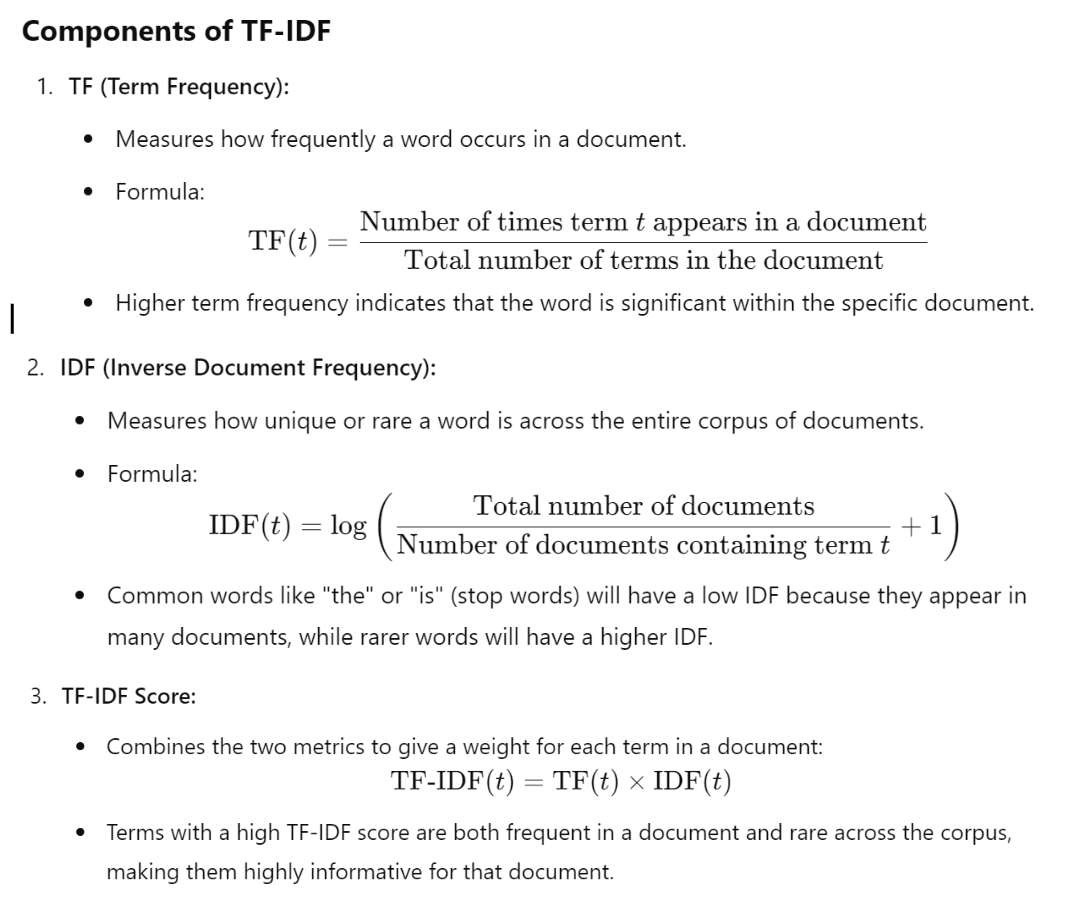

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Documentos de ejemplo
docs = [
    "el gato come pescado",
    "el perro come carne",
    "el gato y el perro"
]

# Crear vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar y transformar
X = vectorizer.fit_transform(docs)

# Convertir a DataFrame para visualizar mejor
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar la matriz TF-IDF
print(df_tfidf.round(2))


   carne  come    el  gato  perro  pescado
0   0.00  0.48  0.37  0.48   0.00     0.63
1   0.63  0.48  0.37  0.00   0.48     0.00
2   0.00  0.00  0.74  0.48   0.48     0.00


## IDF es una variable global para todos los registros del corpus
$$
\text{IDF(t)} = 1 + \ln\left(\frac{1 + N}{1 + \text{df(t)}}\right)
$$
Con $N$ el número de documentos y $df(t)$ el número de documentos donde aparece el término $t$.

In [62]:
#TARDA EN EJECUTAR
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfTransformer
'''
Cuanto más común, más bajo es el TfidfVectorizer
'''
sent1 = 'My name is Ralph'
sent2 = 'Ralph is fat'
sent3 = 'Ralph'

test = TfidfVectorizer()
test.fit_transform([sent1, sent2, sent3])
print(test.idf_)
print(test.get_feature_names_out())

[1.69314718 1.28768207 1.69314718 1.69314718 1.        ]
['fat' 'is' 'my' 'name' 'ralph']


## Fin del inciso

In [63]:
# 1 + ln(N + 1 / count + 1)
1 + np.log((3 + 1)/(1 + 1))

np.float64(1.6931471805599454)

In [64]:
#TARDA EN EJECUTAR
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(reviews_train_clean)
X = tfidf_vectorizer.transform(reviews_train_clean)
X_test = tfidf_vectorizer.transform(reviews_test_clean)

train_model(X, X_test)

Final Accuracy: 0.88176


In [65]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
print(X_baseline.shape)
print(X.shape)
print("Diff X normal y X tras lematizador y vectorización:", X_baseline.shape[1] - X.shape[1])

(25000, 87063)
(25000, 87063)
Diff X normal y X tras lematizador y vectorización: 0


# Support Vector Machines (SVM)

Recall that linear classifiers tend to work well on very sparse datasets (like the one we have). Another algorithm that can produce great results with a quick training time are Support Vector Machines with a linear kernel.

Build a model with an n-gram range from 1 to 2:

In [67]:
#TARDA EN EJECUTAR
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# SVM con bigramas
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)



def train_model_svm(X_TRAIN, X_TEST):
    
    svm = LinearSVC()
    
    params = {
        'C': [0.01, 0.05, 0.25, 0.5, 1]
    }
    
    grid = GridSearchCV(svm, params, cv=5)
    grid.fit(X_TRAIN, target)

    print ("Final Accuracy: %s" % accuracy_score(target, grid.best_estimator_.predict(X_TEST)))
    

train_model_svm(X, X_test)

Final Accuracy: 0.89768


# Final Model

Removing a small set of stop words along with an n-gram range from 1 to 3 and a linear support vector classifier shows the best results.

In [68]:
#TARDA EN EJECUTAR
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC


stop_words = ['in', 'of', 'at', 'a', 'the']
ngram_vectorizer = CountVectorizer(binary=True,
                                   ngram_range=(1, 3),
                                   stop_words=stop_words)

ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

train_model(X, X_test)

Final Accuracy: 0.90012


# Top Postitive and Negative Features

Obtain the most important features of the model.

In [69]:
#TARDA EN EJECUTAR
cv = CountVectorizer(binary=True)
cv.fit(reviews_train_clean)
X = cv.transform(reviews_train_clean)

log_reg = LogisticRegression(C=0.5)
log_reg.fit(X, target)

# Importancia de los coeficientes. En total, todas las palabras vectorizadas
print(len(log_reg.coef_[0]))

# Cada coeficiente va asociado a una palabra
cv.get_feature_names_out()

# Montamos un diccionario con palabra -> coeficiente
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names_out(), log_reg.coef_[0]
    )
}

87063


In [70]:
feature_to_coef

{'____': np.float64(-0.03251350302199882),
 '_____': np.float64(0.2566873839187485),
 '______': np.float64(0.25722185573546996),
 '_________': np.float64(0.050167194161409474),
 '____________________________________': np.float64(0.0018406740183307731),
 '_____________________________________': np.float64(0.0014373834231747608),
 '__________________________________________________________________': np.float64(0.01363193683981781),
 '____insert': np.float64(-0.0003072833813730425),
 '_a': np.float64(-0.0019365123096556538),
 '_absolute': np.float64(-0.0008497789670753645),
 '_am_': np.float64(-0.11842429524845215),
 '_and_': np.float64(-0.002096630052339906),
 '_angel_': np.float64(-0.0024910758845858704),
 '_annie_': np.float64(-0.0008497789670753645),
 '_any_': np.float64(-0.01054521118816183),
 '_anything_': np.float64(0.004589874171208494),
 '_apocalyptically': np.float64(-0.06522981312573552),
 '_as': np.float64(-0.01556197054833146),
 '_atlantis_': np.float64(-0.0005772287241196388

In [71]:
log_reg.predict(cv.transform(['This movie is horrible']))

array([0])

In [72]:
log_reg.predict(cv.transform(['This movie is incredible']))

array([1])

In [73]:

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print(best_positive)
    
print('################################')
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print(best_negative)
    

('excellent', np.float64(1.3824276911090625))
('refreshing', np.float64(1.2817893118767159))
('perfect', np.float64(1.205742921120973))
('superb', np.float64(1.1536195719726952))
('appreciated', np.float64(1.133917467837408))
################################
('worst', np.float64(-2.075626262928442))
('waste', np.float64(-1.9199689605859493))
('disappointment', np.float64(-1.6946209822433387))
('poorly', np.float64(-1.6776717517060358))
('awful', np.float64(-1.5408757475689352))
